Data Cleaning

Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns 
import matplotlib.pyplot as plt

Read dataset file

In [2]:
df = pd.read_csv(r'C:\Users\mycom\Downloads\Dataset\jobs_in_data_2024.csv')
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
0,2024,entry,Freelance,applied data scientist,30000.0,USD,30000,United Kingdom,Remote,United Kingdom,M,Data Science and Research
1,2024,exec,NaN,business intelligence,2300000.0,USD,230000,United States,In-person,United States,M,BI and Visualization
2,2024,exec,NaN,business intelligence,176900.0,USD,176900,United States,In-person,United States,M,BI and Visualization
3,2024,senior,Full-time,data architect,171210.0,USD,171210,Canada,In-person,Canada,M,Data Architecture and Modeling
4,2024,senior,Full-time,data architect,NaN,USD,92190,Canada,In-person,Canada,M,Data Architecture and Modeling
...,...,...,...,...,...,...,...,...,...,...,...,...
14904,2023,senior,Full-time,data engineer,260000.0,USD,260000,United States,In-person,United States,M,Data Engineering
14905,2023,Mid-level,Full-time,data engineer,160000.0,USD,160000,United States,Remote,United States,M,Data Engineering
14906,2023,senior,Full-time,research scientist,204500.0,USD,204500,United States,In-person,United States,M,Data Science and Research
14907,2024,senior,Full-time,analytics engineer,152000.0,USD,152000,United States,In-person,United States,M,Leadership and Management


The decription of data

In [3]:
df.describe()

,work_year,salary,salary_in_usd
count,14909.000000,1.342500e+04,14909.000000
mean,2023.110806,2.156274e+05,149334.236971
std,0.686943,3.317531e+05,64279.519669
min,2020.000000,1.400000e+04,15000.000000
25%,2023.000000,1.050000e+05,103500.000000
50%,2023.000000,1.451000e+05,141846.000000
75%,2024.000000,1.980000e+05,185900.000000
max,2024.000000,3.760800e+06,450000.000000


Information about data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14909 entries, 0 to 14908
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           14909 non-null  int64  
 1   experience_level    14909 non-null  object 
 2   employment_type     13481 non-null  object 
 3   job_title           13401 non-null  object 
 4   salary              13425 non-null  float64
 5   salary_currency     14909 non-null  object 
 6   salary_in_usd       14909 non-null  int64  
 7   employee_residence  13412 non-null  object 
 8   work_setting        14909 non-null  object 
 9   company_location    14909 non-null  object 
 10  company_size        14909 non-null  object 
 11  job_category        14909 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 1.4+ MB


In [5]:
df['work_year'] = 2024
print(df['work_year'].head(10))

0    2024
1    2024
2    2024
3    2024
4    2024
5    2024
6    2024
7    2024
8    2024
9    2024
Name: work_year, dtype: int64


Handling Missing Values

In [6]:
# Check for missing values
df.isnull().sum()

work_year                0
experience_level         0
employment_type       1428
job_title             1508
salary                1484
salary_currency          0
salary_in_usd            0
employee_residence    1497
work_setting             0
company_location         0
company_size             0
job_category             0
dtype: int64

In [7]:
# Impute missing values with median for 'salary' and mode for categorical columns
df['salary'].fillna(df['salary'].median(),inplace=True)

In [8]:
# Impute missing values with median for 'salary' and mode for categorical columns
df['job_title'].fillna(df['job_title'].mode()[0], inplace=True)
df['employment_type'].fillna(df['employment_type'].mode()[0], inplace=True)
df['employee_residence'].fillna(df['employee_residence'].mode()[0], inplace=True)


In [9]:
# Re-check for missing values
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
work_setting          0
company_location      0
company_size          0
job_category          0
dtype: int64

Remove Duplicaton

In [10]:
df.drop_duplicates(inplace=True)

Text Data Standardlization

In [11]:
df['job_title'] = df['job_title'].str.lower().str.strip()
df['company_location'] = df['company_location'].str.upper().str.strip()

Consistency in categorical data

In [12]:
corrections = {'data scienist': 'data scientist', 'dat engineer': 'data engineer','exec':'executive'}
df['job_title'] = df['job_title'].replace(corrections)
df['experience_level'] = df['experience_level'].replace(corrections)


 Handling outliers in numerical data

In [13]:
Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['salary_in_usd'] >= lower_bound) & (df['salary_in_usd'] <= upper_bound)]


Verfication of Data Types

In [14]:
df['work_year'] = df['work_year'].astype(int)
df['salary_in_usd'] = df['salary_in_usd'].astype(float)


d:\Myanaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
d:\Myanaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9212 entries, 0 to 14899
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           9212 non-null   int32  
 1   experience_level    9212 non-null   object 
 2   employment_type     9212 non-null   object 
 3   job_title           9212 non-null   object 
 4   salary              9212 non-null   float64
 5   salary_currency     9212 non-null   object 
 6   salary_in_usd       9212 non-null   float64
 7   employee_residence  9212 non-null   object 
 8   work_setting        9212 non-null   object 
 9   company_location    9212 non-null   object 
 10  company_size        9212 non-null   object 
 11  job_category        9212 non-null   object 
dtypes: float64(2), int32(1), object(9)
memory usage: 899.6+ KB


Sanity Checks

In [16]:
df = df[df['salary'] > 0]
df = df[df['salary_in_usd'] > 0]

Add IS_remote

In [17]:

df['is_remote'] = df['work_setting'].apply(lambda x: 1 if x == 'Remote' else 0)


In [35]:
df.head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category,is_remote,total_hours_per_week,total_annual_hours,total_hours_per_day,title_length
0,2024,entry,Freelance,applied data scientist,30000.0,USD,30000.0,United Kingdom,Remote,UNITED KINGDOM,M,Data Science and Research,1,30,1500,6.0,3
1,2024,executive,Full-time,business intelligence,2300000.0,USD,230000.0,United States,In-person,UNITED STATES,M,BI and Visualization,0,40,2000,8.0,2


In [18]:
df.salary.unique().tolist()

[30000.0,
 2300000.0,
 176900.0,
 171210.0,
 145100.0,
 46203.0,
 50000.0,
 40000.0,
 276000.0,
 148000.0,
 234000.0,
 146000.0,
 192300.0,
 120200.0,
 132500.0,
 1115000.0,
 322000.0,
 1680000.0,
 152000.0,
 98000.0,
 1380000.0,
 268700.0,
 130300.0,
 600000.0,
 115000.0,
 105000.0,
 80000.0,
 70000.0,
 156476.0,
 104981.0,
 297000.0,
 138000.0,
 190000.0,
 160480.0,
 109920.0,
 224000.0,
 150000.0,
 84000.0,
 75800.0,
 146125.0,
 138400.0,
 94600.0,
 75700.0,
 2448680.0,
 155000.0,
 168000.0,
 158000.0,
 243000.0,
 163000.0,
 112800.0,
 73200.0,
 192500.0,
 192780.0,
 85000.0,
 180000.0,
 112000.0,
 130000.0,
 100000.0,
 140000.0,
 175000.0,
 135000.0,
 110000.0,
 236000.0,
 174000.0,
 242000.0,
 215000.0,
 139800.0,
 1800000.0,
 170000.0,
 75000.0,
 55000.0,
 184800.0,
 123200.0,
 157900.0,
 105300.0,
 252000.0,
 225000.0,
 90000.0,
 117000.0,
 295000.0,
 120000.0,
 106500.0,
 209000.0,
 210000.0,
 2200000.0,
 278700.0,
 159300.0,
 145000.0,
 51550.0,
 60000.0,
 126000.0,
 78000.0,


Add Hour Per week

In [19]:

hours_per_week = {
    'Full-time': 40,
    'Part-time': 20,
    'Freelance': 30,  
    'Contract': 30,  
    'Unknown': 0  
}


df['total_hours_per_week'] = df['employment_type'].map(hours_per_week)


df['total_annual_hours'] = df['total_hours_per_week'] * 50




Add day per week


In [20]:
days_per_week = 5


df['total_hours_per_day'] = df['total_hours_per_week'] / days_per_week

In [21]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category,is_remote,total_hours_per_week,total_annual_hours,total_hours_per_day
0,2024,entry,Freelance,applied data scientist,30000.0,USD,30000.0,United Kingdom,Remote,UNITED KINGDOM,M,Data Science and Research,1,30,1500,6.0
1,2024,executive,Full-time,business intelligence,2300000.0,USD,230000.0,United States,In-person,UNITED STATES,M,BI and Visualization,0,40,2000,8.0
2,2024,executive,Full-time,business intelligence,176900.0,USD,176900.0,United States,In-person,UNITED STATES,M,BI and Visualization,0,40,2000,8.0
3,2024,senior,Full-time,data architect,171210.0,USD,171210.0,Canada,In-person,CANADA,M,Data Architecture and Modeling,0,40,2000,8.0
4,2024,senior,Full-time,data architect,145100.0,USD,92190.0,Canada,In-person,CANADA,M,Data Architecture and Modeling,0,40,2000,8.0


In [22]:
df.describe()

,work_year,salary,salary_in_usd,is_remote,total_hours_per_week,total_annual_hours,total_hours_per_day
count,9212.0,9.212000e+03,9212.000000,9212.000000,9212.000000,9212.000000,9212.000000
mean,2024.0,2.302037e+05,143073.399587,0.346179,39.198871,1959.943552,7.839774
std,0.0,3.700846e+05,62215.201800,0.475777,3.393744,169.687193,0.678749
min,2024.0,1.400000e+04,15000.000000,0.000000,20.000000,1000.000000,4.000000
25%,2024.0,1.050000e+05,95000.000000,0.000000,40.000000,2000.000000,8.000000
50%,2024.0,1.451000e+05,138000.000000,0.000000,40.000000,2000.000000,8.000000
75%,2024.0,1.890000e+05,185000.000000,1.000000,40.000000,2000.000000,8.000000
max,2024.0,3.220000e+06,322000.000000,1.000000,40.000000,2000.000000,8.000000


Data is Cleaned

# Data Analysis


How do salaries vary by experience level?

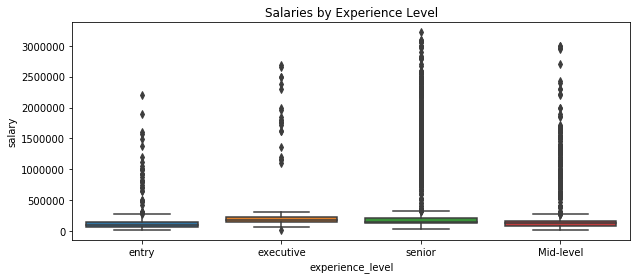

In [23]:
plt.figure(figsize=(10, 4))
sns.boxplot(x='experience_level', y='salary', data=df)
plt.title('Salaries by Experience Level')
plt.show()

What is the distribution of job title across the dataset?

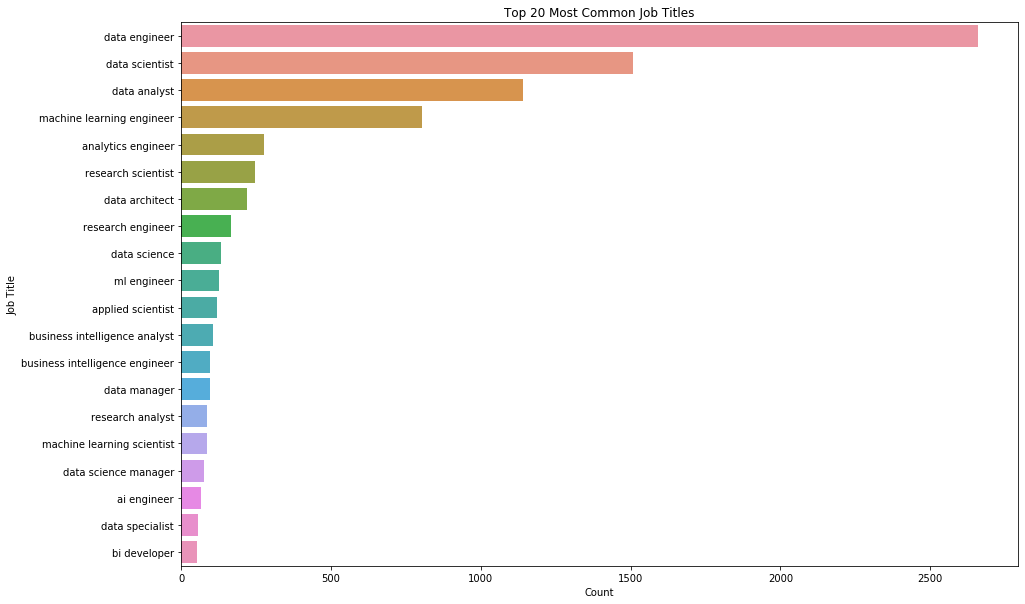

In [24]:
plt.figure(figsize=(15, 10))  # Increase figure size
top_n = 20  # Number of top job titles to display
top_job_titles = df['job_title'].value_counts().head(top_n)
sns.barplot(y=top_job_titles.index, x=top_job_titles.values, orient='h')  # Make a horizontal bar plot
plt.title('Top 20 Most Common Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()


Is there a correlation between salary_in_usd and the cost of living  salary?

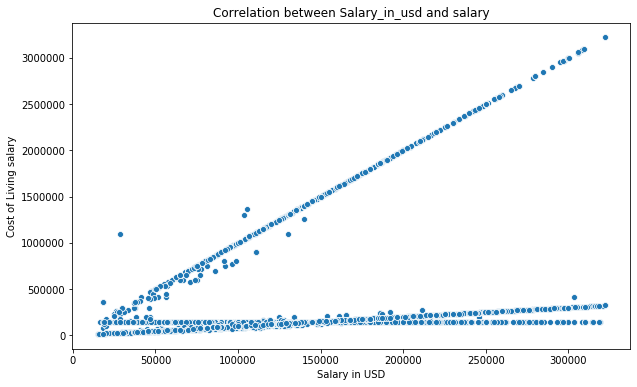

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='salary_in_usd', y='salary', data=df)
plt.title('Correlation between Salary_in_usd and salary')
plt.xlabel('Salary in USD')
plt.ylabel('Cost of Living salary')
plt.show()


How does the salary distribution vary by country?

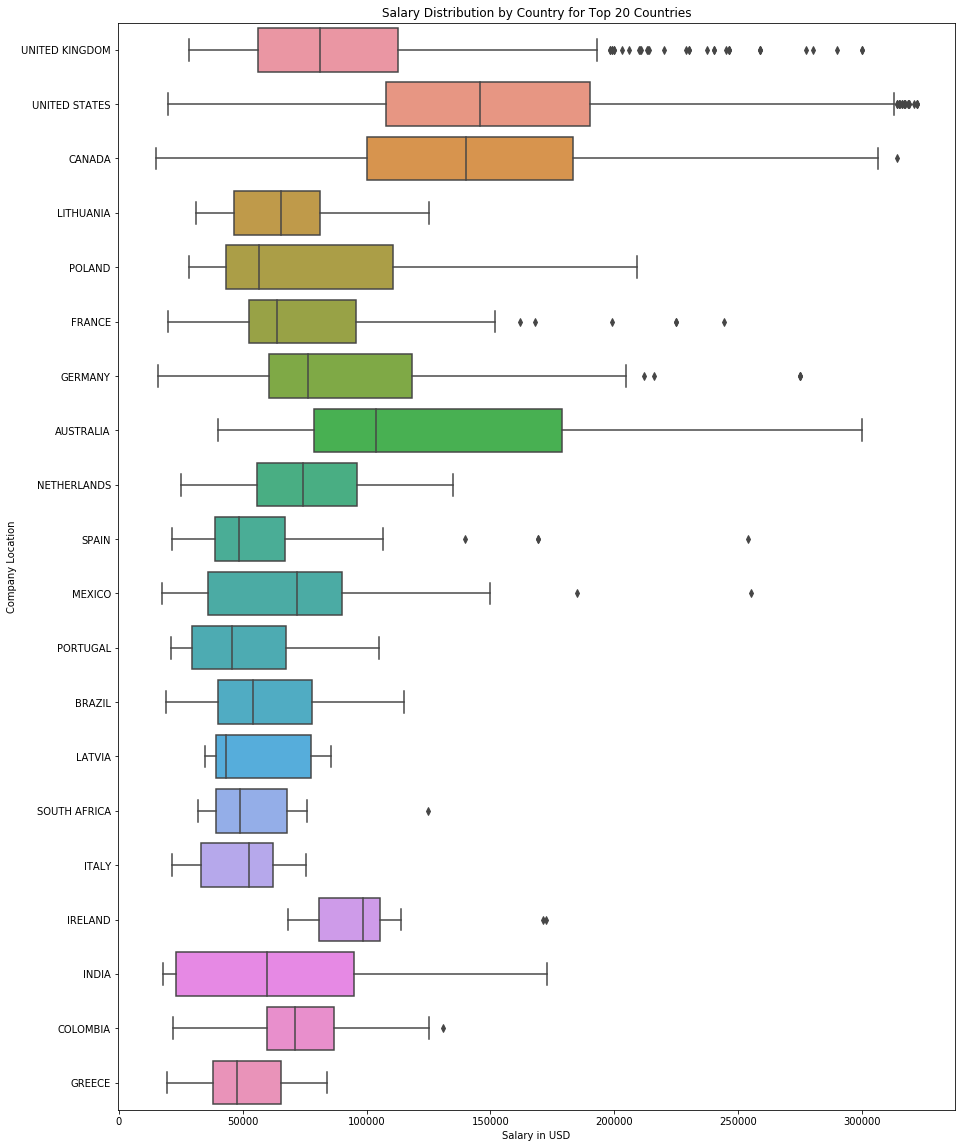

In [26]:

plt.figure(figsize=(15, 20))


top_countries = df['company_location'].value_counts().head(20).index


filtered_df = df[df['company_location'].isin(top_countries)]


sns.boxplot(
    x='salary_in_usd',
    y='company_location',
    data=filtered_df,
    orient='h'
)

plt.title('Salary Distribution by Country for Top 20 Countries')
plt.xlabel('Salary in USD')
plt.ylabel('Company Location')
plt.show()


What are the common employment types and their proportion?

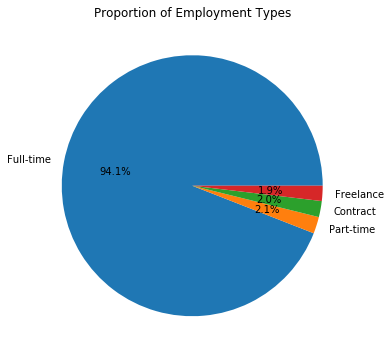

In [27]:
employment_type_counts = df['employment_type'].value_counts()
plt.figure(figsize=(10, 6))
employment_type_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Employment Types')
plt.ylabel('')
plt.show()


What is the relationship between company size and salary?

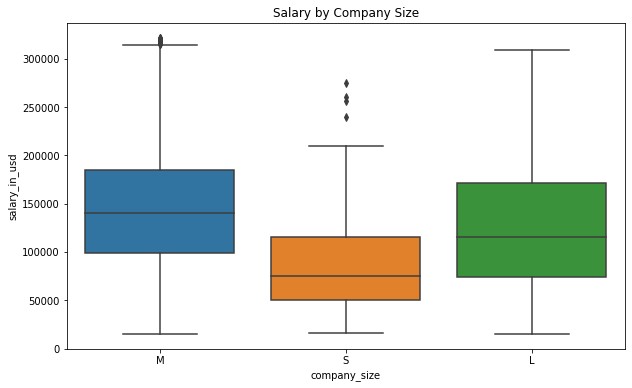

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='company_size', y='salary_in_usd', data=df)
plt.title('Salary by Company Size')
plt.show()

Are there trends in the number of jobs per category over time?

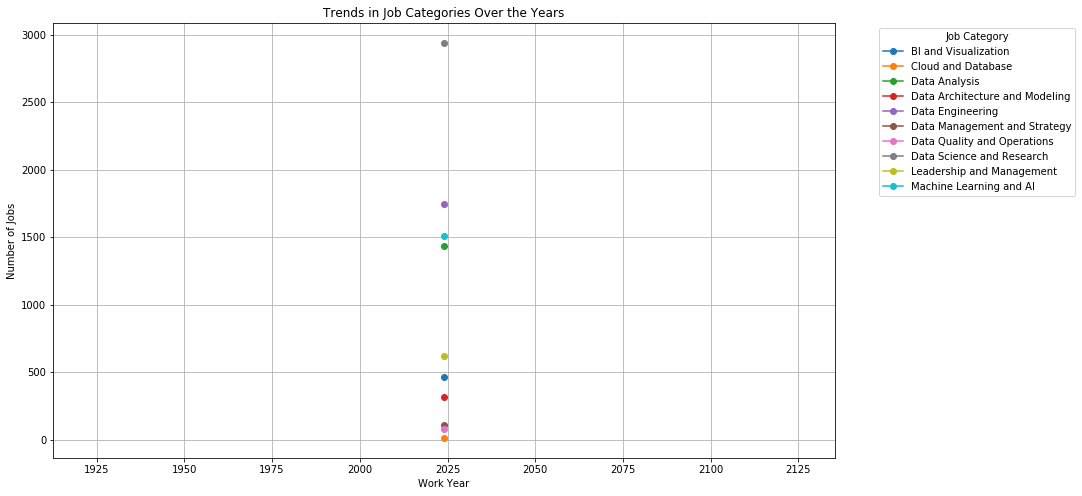

In [29]:

# Group by 'work_year' and 'job_category' and count the number of jobs
jobs_over_time = df.groupby(['work_year', 'job_category']).size().unstack(fill_value=0)

# Plot the data
jobs_over_time.plot(kind='line', figsize=(14, 8), marker='o')
plt.title('Trends in Job Categories Over the Years')
plt.xlabel('Work Year')
plt.ylabel('Number of Jobs')
plt.grid(True)
plt.legend(title='Job Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Which job titles have the highest average salaries?

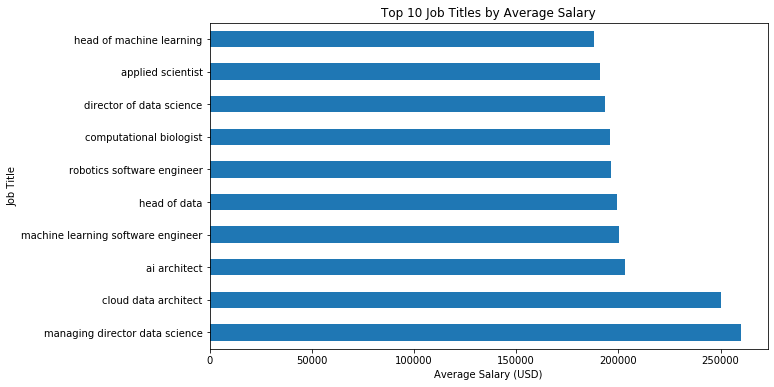

In [30]:
top_job_titles = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10)
top_job_titles.plot(kind='barh', figsize=(10, 6))
plt.title('Top 10 Job Titles by Average Salary')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Job Title')
plt.show()

How do work settings (remote vs. in-person) affect salaries?

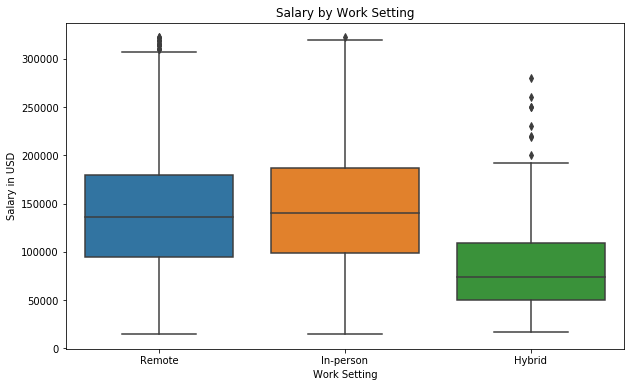

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='work_setting', y='salary_in_usd', data=df)
plt.title('Salary by Work Setting')
plt.xlabel('Work Setting')
plt.ylabel('Salary in USD')
plt.show()

What is the geographical distribution of the jobs?

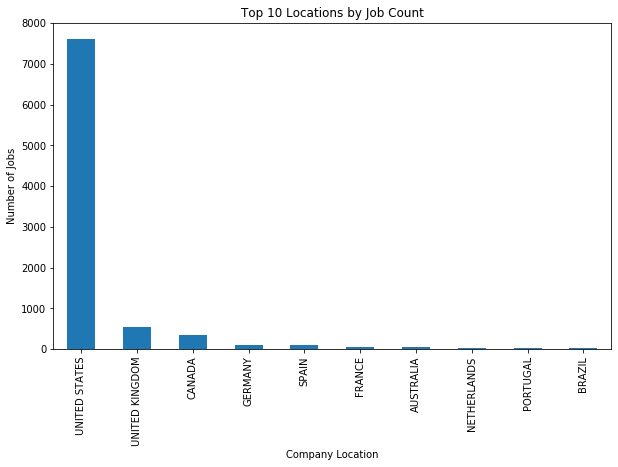

In [32]:
location_counts = df['company_location'].value_counts().head(10)  
location_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Locations by Job Count')
plt.xlabel('Company Location')
plt.ylabel('Number of Jobs')
plt.show()

Salary Distribution by Employment Type and Experience Level

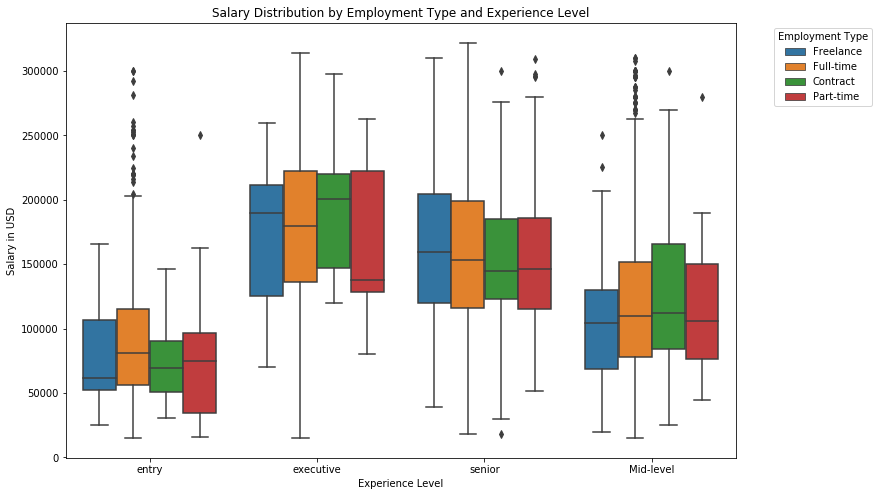

In [33]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='experience_level', y='salary_in_usd', hue='employment_type', data=df)
plt.title('Salary Distribution by Employment Type and Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Job Title Length vs. Salary

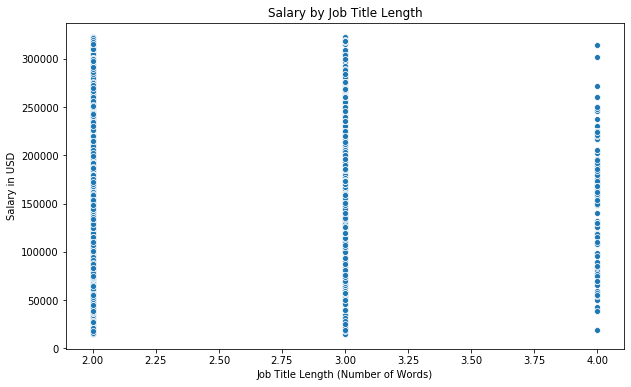

In [34]:

df['title_length'] = df['job_title'].apply(lambda x: len(x.split()))  
plt.figure(figsize=(10, 6))
sns.scatterplot(x='title_length', y='salary_in_usd', data=df)
plt.title('Salary by Job Title Length')
plt.xlabel('Job Title Length (Number of Words)')
plt.ylabel('Salary in USD')
plt.show()


Conclusion

1-How do salaries vary by experience level?

2-What is the distribution of job titles across the dataset?

3-Is there a correlation between salary_in_usd and the cost of living  salary?

4-How does the salary distribution vary by country?

5-What are the common employment types and their proportion?

6-What is the relationship between company size and salary?

7-Are there trends in the number of jobs per category over time?

8-Which job titles have the highest average salaries?

9-How do work settings (remote vs. in-person) affect salaries?

10-What is the geographical distribution of the jobs?

11-Salary Distribution by Employment Type and Experience Level

12-Job Title Length vs. Salary